[SDSS to Pan-STARRS](http://iopscience.iop.org/article/10.3847/0004-637X/822/2/66/pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def PS_to_SDSS(params,band):
    '''
    Converts PS1 grizy photometry to SDSS grizy.
    
    Input:
    -----------
    params - dataframe: Target list with at least g and i magnitude 
                        in PS1 given with gmag and imag as columns.
    band - str: One of the following: u, g, r, i, z, y, found in
                params with band+mag column.
                
    Return:
    ------------
    sdss - series: same length as params containing the converted SDSS
                   band magnitude
    '''
    x = params.gmag-params.imag
    df = pd.read_csv('stars_shortlist/static/SDSS_to_PS.csv')
    df = df[df.Band==band].iloc[0]
    band+='mag'
    sdss = params[band] - df.a_0 - df.a_1*x - df.a_2*(x**2) - df.a_3*(x**3)

    return sdss

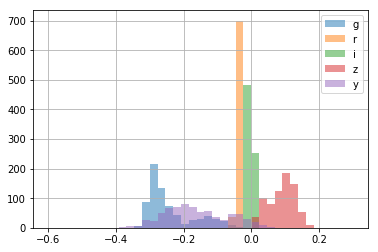

In [3]:
cluster = 'M44'
test = 'run_06'
params = pd.read_csv('stars_shortlist/{0}/{0}_parameter.csv'.format(cluster))
oid_list = params.EPIC.tolist()
b = ['g','r','i','z','y']
for band in b:
    sdssb = 'SDSS_{}'.format(band)
    ps1b = 'PS1_{}'.format(band)
    params[sdssb] = PS_to_SDSS(params, band)
    old = params['{}mag'.format(band)]
    params[ps1b] = old
    dif = params[ps1b]-params[sdssb]
    dif.hist(label='{0}'.format(band),alpha=0.5,bins=np.linspace(-.6,.3,40))
plt.legend()

    

params.to_csv('stars_shortlist/{0}/{0}_parameter.csv'.format(cluster))